# SmartAd Campaing Performance Testing

- auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.
- experiment: which group the user belongs to - control or exposed.
- date: the date in YYYY-MM-DD format
- hour: the hour of the day in HH format.
- device_make: the name of the type of device the user has e.g. Samsung
- platform_os: the id of the OS the user has. 
- browser: the name of the browser the user uses to see the BIO questionnaire.
- yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
- no: 1 if the user chooses the “No” radio button for the BIO questionnaire.


## Visualising the Collected Data

In [1]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')

In [2]:
#Importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Scripts
import graph_utils as graph

In [3]:
#Configuring Notebook settings
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_column', None)

In [4]:
#Importing the collected Data
file_name = '../data/AdSmartABdata.csv'
collected_data = pd.read_csv(file_name)
collected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
collected_data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2303,4b7e13dc-0146-4544-803a-2cef4d04b583,exposed,2020-07-03,9,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
5265,a6f5d0f0-c72e-4997-966d-593416b8e513,exposed,2020-07-09,9,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
7750,f59d0e93-74c9-4c74-94c1-67054b5f9c08,exposed,2020-07-06,7,Generic Smartphone,6,Chrome Mobile,0,0
7673,f2f58593-3a03-4002-ba94-2d68e6bc0a8d,exposed,2020-07-09,8,Generic Smartphone,6,Chrome Mobile,0,0
2471,50239105-becc-45a2-ac74-68510fb8b239,exposed,2020-07-07,11,iPhone,5,Mobile Safari,0,0


In [6]:
#total numbers of Users part of the test
collected_data.shape[0]

8077

In [7]:
# Check if all the users are unique
number_of_users = collected_data.auction_id.unique()
# Number of users must be equal to row size of the collected data
print(f'The data has {collected_data.shape[0] - len(number_of_users)} repeated users.')

The data has 0 repeated users.


In [8]:
#Users who either answered yes or no
answered_df = collected_data.copy(deep=True)
answered_df = answered_df[answered_df['yes'] == 1].append(answered_df[answered_df['no'] == 1])
answered_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [9]:
# Total Users who responded to the static or new Ad
answered_df.shape[0]

1243

In [10]:
# Percentage of users who responded
answered_percentage = answered_df.shape[0] / collected_data.shape[0]
print('The number of users who answered are: {:.2%}'.format(answered_percentage))

The number of users who answered are: 15.39%


In [11]:
# Identifying the control group
control_df = answered_df[answered_df['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1,0
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1,0


In [12]:
# Identifying the exposed group
exposed_df = answered_df[answered_df['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


- There are 586 users in the control group
- There are 657 users in the exposed group

In [13]:
#plotting distribution of the control group
df_1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_1['response'] = 1
df_2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df_2['response'] = 0
control_plot_df = df_1.append(df_2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


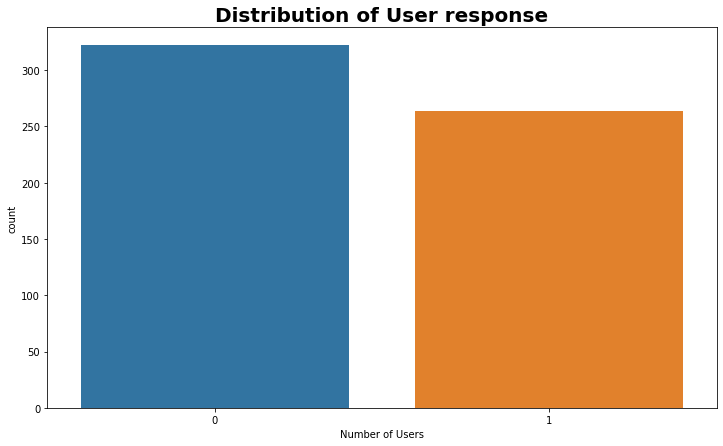

In [14]:
# Plotting the Control groups reponse distribution
graph.plot_count(control_plot_df, 'response')

In [15]:
#plotting distribution of the exposed group
df_1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_1['response'] = 1
df_2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df_2['response'] = 0
exposed_plot_df = df_1.append(df_2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


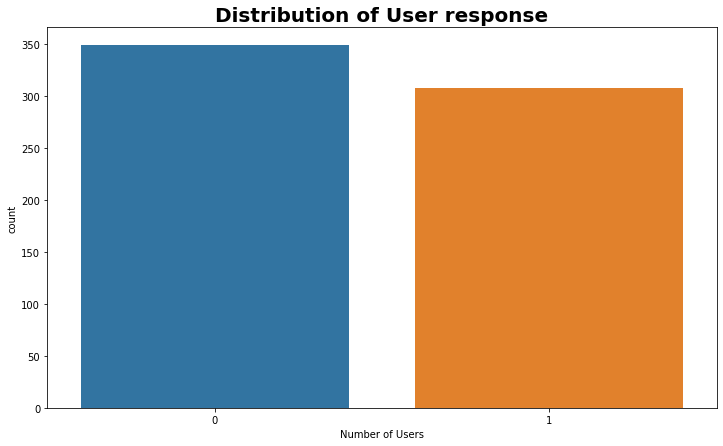

In [16]:
# Plotting the Exposed groups reponse distribution
graph.plot_count(exposed_plot_df, 'response')

In [17]:
# Pecrcentage from the answered for each group
# Controlled Group
con_answered_percentage = control_df.shape[0] / answered_df.shape[0]
print('The percentage of users from the control group who answered are: {:.2%}'.format(con_answered_percentage))
# Exposed Group
exp_answered_percentage = exposed_df.shape[0] / answered_df.shape[0]
print('The percentage of users from the exposed group who answered are: {:.2%}'.format(exp_answered_percentage))

The percentage of users from the control group who answered are: 47.14%
The percentage of users from the exposed group who answered are: 52.86%


In [18]:
#Number of users who repsonded positively in the control group
pos_control_df = control_df[control_df['yes'] == 1]
pos_control_df.shape[0]

264

In [19]:
#Number of users who repsonded positively in the exposed group
pos_exposed_df = exposed_df[exposed_df['yes'] == 1]
pos_exposed_df.shape[0]

308

- 264 Users responded postiviely to the static Ad from the total 586 Users who responded
- 308 Users responded postively to the SmartAd from the total 657 Users who responeded

In [20]:
# Controlled Group Positive answer
pos_con_answered_percentage = pos_control_df.shape[0] / control_df.shape[0]
print('The percentage of users from the control group who answered "yes": {:.2%}'.format(pos_con_answered_percentage))
# Exposed Group Positive answer
pos_exp_answered_percentage = pos_exposed_df.shape[0] / exposed_df.shape[0]
print('The percentage of users from the exposed group who answered "yes": {:.2%}'.format(pos_exp_answered_percentage))

The percentage of users from the control group who answered "yes": 45.05%
The percentage of users from the exposed group who answered "yes": 46.88%


In [21]:
# Forming a combined DataFrame substituting the yes and no column to response and having only 1 and 0 as values where 1 translates to a yes and 0 to no
#All users who answered yes
all_yes_df = control_df[control_df['yes'] == 1].append(exposed_df[exposed_df['yes'] == 1])
all_yes_df = all_yes_df.drop(['yes','no'], axis = 1)
all_yes_df['response'] = 1
#All users who answered no
all_no_df = control_df[control_df['no'] == 1].append(exposed_df[exposed_df['no'] == 1])
all_no_df = all_no_df.drop(['yes','no'], axis = 1)
all_no_df['response'] = 0
#Final Combined dataframe will be
combined_df = all_yes_df.append(all_no_df)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,a887ef20-2df0-4328-a942-528cdf77f02c,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0
1,7229d3ef-4200-49d2-948f-c8df366b3a44,control,2020-07-07,9,Generic Smartphone,6,Chrome Mobile,1
2,a22d8bdf-6714-4637-97e0-6788509af6b6,control,2020-07-04,11,Samsung SM-A530F,6,Samsung Internet,1
3,ada7941c-2680-4f5e-9183-04514f139fba,control,2020-07-10,12,LG-$2,6,Chrome Mobile,1
4,a67c0609-3e55-4aec-9078-e9bd2c528ce8,exposed,2020-07-07,11,Generic Smartphone,6,Chrome Mobile,0


## Grouping Users

### Based on Date

In [30]:
date_group_df = combined_df.groupby('date').agg({'experiment':'count','hour':'sum','response':'sum'})
date_group_df

,experiment,hour,yes,no
date,,,,
2020-07-03,2015,27163,147,178
2020-07-04,903,9278,76,83
2020-07-05,890,9455,52,65
2020-07-06,490,2821,35,39
2020-07-07,480,5079,38,45
2020-07-08,1198,18388,85,92
2020-07-09,1208,13729,85,99
2020-07-10,893,7902,54,70


### Based on Hour

### Based on Device Make

In [31]:
browser_group_df = combined_df.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
browser_group_df


,experiment,hour,yes,no
browser,,,,
Android,1,15,0,0
Chrome,3,45,1,1
Chrome Mobile,4554,53397,314,381
Chrome Mobile WebView,1489,15847,116,111
Chrome Mobile iOS,51,607,1,0
Edge Mobile,1,13,0,0
Facebook,764,9307,69,87
Firefox Mobile,1,1,0,0
Mobile Safari,337,3833,4,10


### Based on Browser Type

In [32]:
date_group_df = combined_df.groupby('device_make').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
date_group_df


,experiment,hour,yes,no
device_make,,,,
5008Y_EEA,1,15,0,0
5099Y,1,19,0,0
6039Y,1,7,0,0
A0001,2,11,1,0
ALE-L21,1,7,0,0
...,...,...,...,...
XiaoMi Redmi S2,1,10,1,0
YAL-L21,3,57,1,0
iPhone,433,5041,5,13


Based on OS Type

In [33]:
os_group_df = combined_df.groupby('platform_os').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
os_group_df


,experiment,hour,yes,no
platform_os,,,,
5,428,4972,5,12
6,7648,88830,567,659
7,1,13,0,0
